# 단순선형회귀

단순 선형 회귀 분석으로 농어의 길이를 가지고 무게를 예측하는 모델을 만들어 보자

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb                                    # 데이터 시각화를 위한 모듈
from pandas import read_excel                           # 엑셀 데이터를 가져오기 위한 모듈
from matplotlib import pyplot as plt                    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리 모듈

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/fish.xlsx")
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


## #02. 데이터 전처리

### [1] 필요한 변수만 추출

In [4]:
df = origin[['길이', '무게']]
df.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


### [2] 데이터 분포 확인

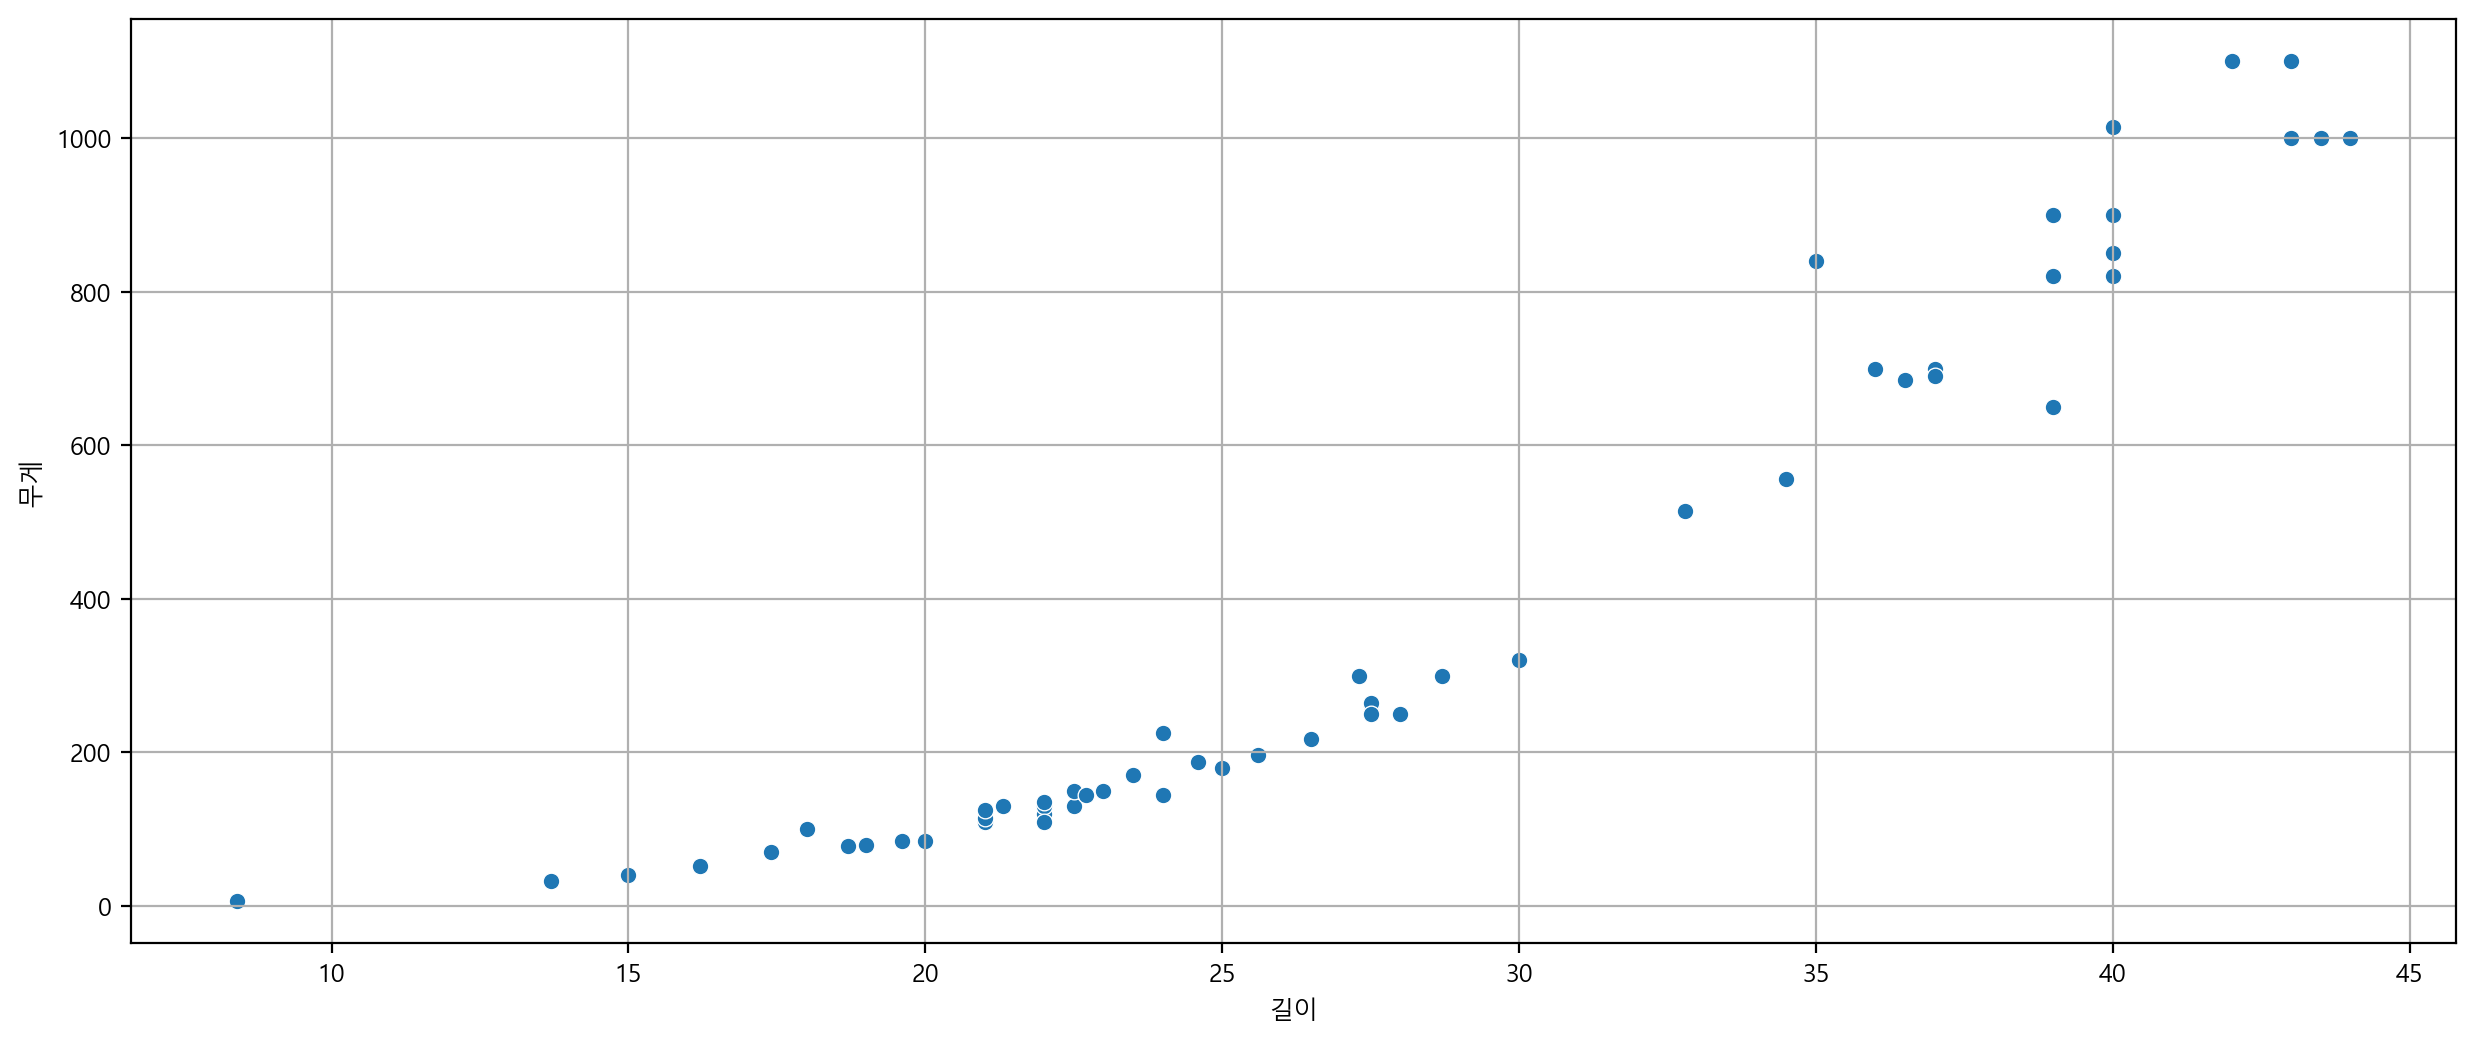

In [5]:
plt.figure()
sb.scatterplot(data=df, x='길이', y='무게')
plt.grid()
plt.show()
plt.close()

### [3] 훈련데이터와 검증데이터 분할

- train data / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test data / 검증데이터 : 모델이 얼마나 잘 만들어졌는지 확인하는 용도

#### (1) 독립변수 분리

> 수업 내에서 규칙 : 독립변수만 모아 놓은 데이터 프레임 형태로 사용

In [6]:
x = df[['길이']]
x.head()

,길이
0,8.4
1,13.7
2,15.0
3,16.2
4,17.4


#### (2) 종속변수 분리

> 수업 내에서의 규칙 : numpy array 혹은 시리즈 객체로 사용

In [7]:
y = df['무게']
y.head()

0     5.9
1    32.0
2    40.0
3    51.5
4    70.0
Name: 무게, dtype: float64

#### (3) 데이터 분할

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1100)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 1), (17, 1), (39,), (17,))

## #03. 데이터 분석

### [1] 선형회귀 모델 구축

In [11]:
# 분석 알고리즘에 대한 객체 생성
model = LinearRegression()

# 학습 데이터 설정
fit = model.fit(x_train, y_train)

print("계수(기울기): ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

"y = {0:0.2f} * X + {1:0.2f}".format(fit.coef_[0], fit.intercept_)

계수(기울기):  [36.96786533]
절편:  -639.3124532735806
훈련 데이터 설명력:  0.9234198194114134
검증 데이터 설명력:  0.8979712395256748


'y = 36.97 * X + -639.31'

### [2] 분석 결과 확인

#### (1) 훈련 데이터에 대한 예측값 얻기

`y_train`과 얼마나 차이가 나는가 확인이 필요하다.

In [12]:
y1 = fit.predict(x_train)
y1

array([ 210.94844924,  173.98058392,  968.78968845,  377.30384322,
        369.91027015,  137.01271859,  192.46451658,   26.10912261,
        137.01271859,  247.91631457, -132.8526983 ,  100.04485326,
        199.85808965,  987.27362111,  728.49856382,  229.43238191,
        173.98058392,  421.66528161,   63.07698794,  950.30575578,
        950.30575578,  173.98058392,  270.09703377, -328.78238453,
        802.43429448,  -40.43303498,  173.98058392,  802.43429448,
        728.49856382,  307.06489909,  654.56283317,  469.72350653,
        173.98058392,   85.25770713,  913.33789046,  839.4021598 ,
        839.4021598 ,  802.43429448,   51.98662834])

#### (2) 검증 데이터에 대한 예측값 얻기

`y_test`와 얼마나 차이가 나는가 확인이 필요하다.

In [13]:
y2 = fit.predict(x_test)
y2

array([691.53069849, 377.30384322, 137.01271859, 192.46451658,
       839.4021598 , 395.78777588,   3.92840341, 636.0789005 ,
       148.10307819, 377.30384322, 284.8841799 , -84.79447337,
       839.4021598 , 340.33597789, 247.91631457, 573.23352945,
       710.01463116])

### [3] 분석 결과 시각화

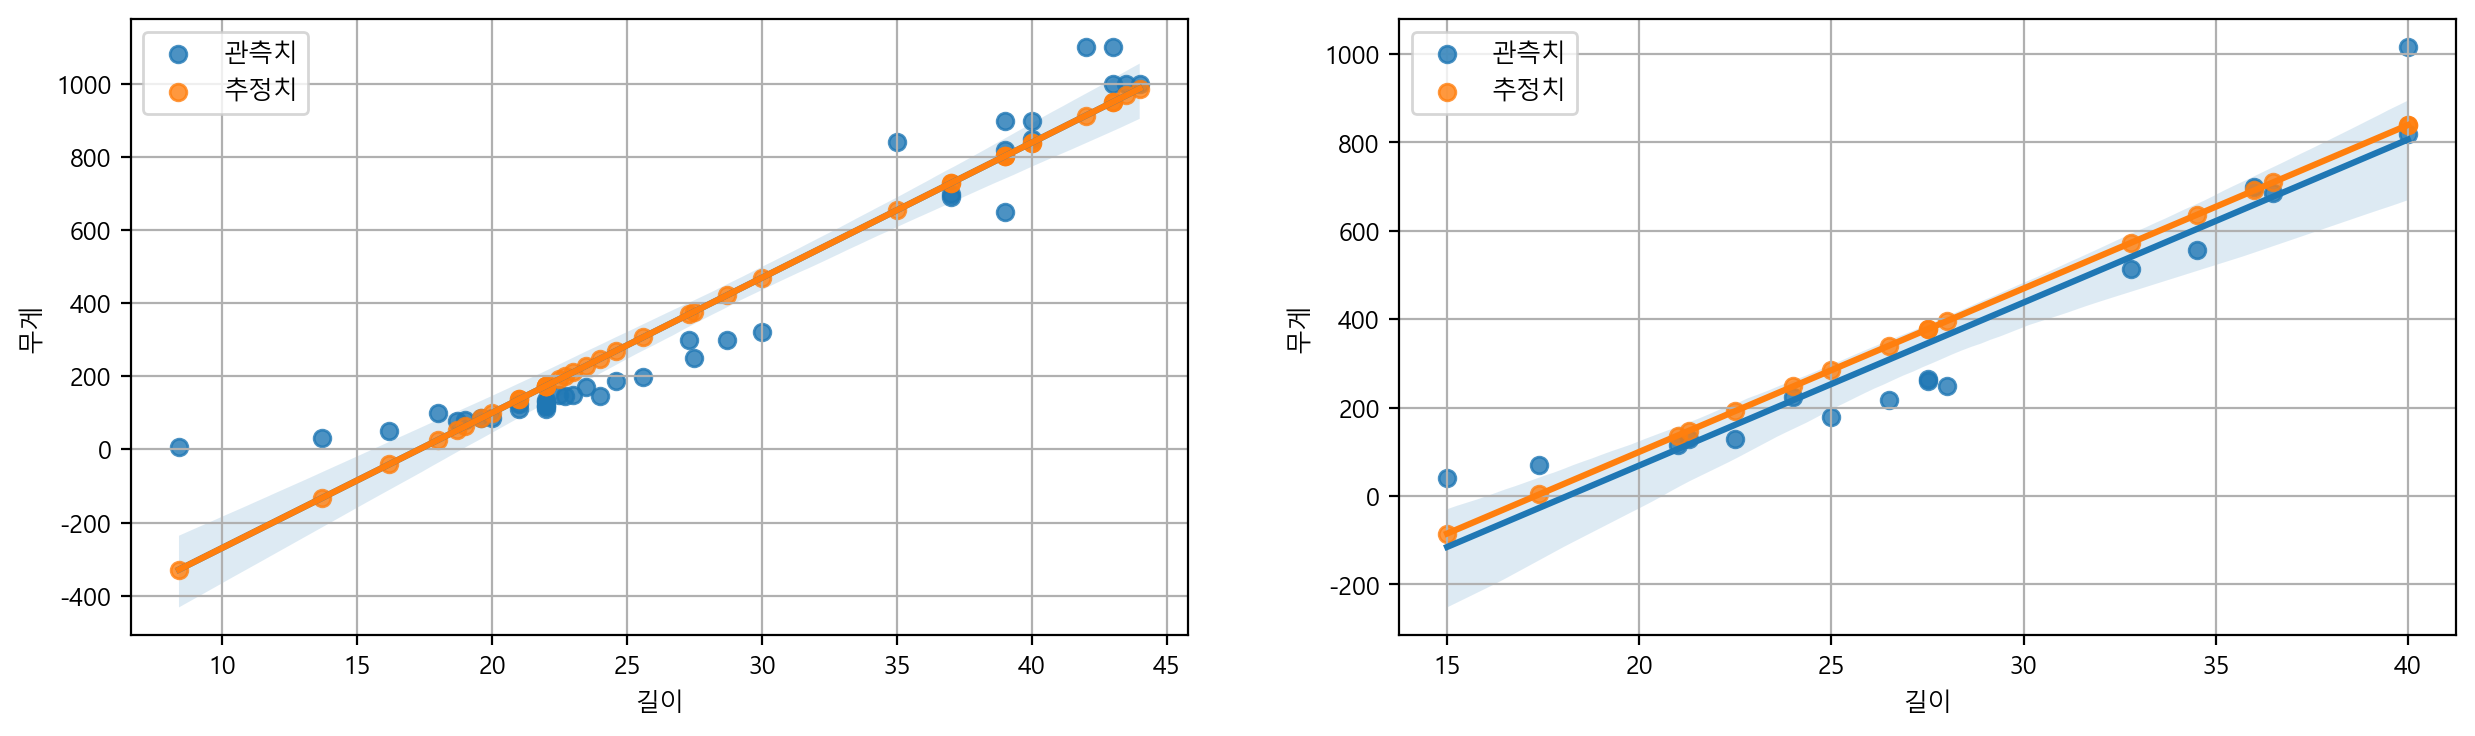

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

sb.regplot(x=x_train['길이'], y=y_train, ax=ax1, label='관측치')
sb.regplot(x=x_train['길이'], y=y1, ax=ax1, label='추정치')

sb.regplot(x=x_test['길이'], y=y_test, ax=ax2, label='관측치')
sb.regplot(x=x_test['길이'], y=y2, ax=ax2, label='추정치')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.show()
plt.close()

> 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다.(=잔차가 크다)

## #04. 과적합의 이해

실제 데이터와 머신러닝의 추정치가 일치하지 않는 현상

### [1] 과소적합

분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

![res/1.png](res/1.png)

모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

#### 해결방법

- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공(하이퍼파라미터 튜닝)

> 결국은 변수를 늘리라는 뜻

### [2] 과대적합

훈련 데이터에 있는 잠음의 양이 모델에 비해 너무 복잡한 경우

설명력에 비해 잔차가 큰 경우라 할 수 있다.

![res/2.png](res/2.png)

#### 해결방법

- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임 (차원축소)
- 모델을 단순화 시킴
- 훈련 데이터의 잡음을 줄임 (이상치 제거)

> 결국은 변수를 줄이라는 뜻